### Denoising Microscope Images

Filters work by convolution with a moving window called a kernel.

Convolution is nothing but multiplication of two arrays of different sizes. 

The image will be of one size and the kernel with be of a different size, usually much smaller than image

The input pixel is at the centre of the kernel. 

The convolution is performed by sliding the kernel over the image, 
usually from top left of image.

Linear filters and non-linear filters.

Gaussian is an example of linear filter. 

Non-linear filters preserve edges.

Median filter is an example of non-linear filter. 

The algorithm selects the median value of all the pixels in the selected window

[[0.04491922 0.12210311 0.04491922]
 [0.12210311 0.33191066 0.12210311]
 [0.04491922 0.12210311 0.04491922]]


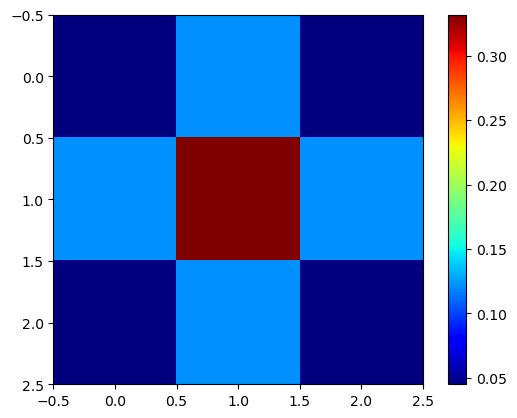

In [5]:
### What is gaussian Kernel #####
import numpy 
from matplotlib import pyplot as plt

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 

gaussian_kernel_array = gaussian_kernel(1)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()


In [7]:
############################ Denoising filters ###############
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np

from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imsave("images/gaussian.jpg", gaussian_img)
plt.imshow(gaussian_img)

median_img = nd.median_filter(img, size=3)
plt.imsave("images/median.jpg", median_img)
plt.imshow(median_img)

gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imsave("images/gaussian.jpg", gaussian_img)
plt.imshow(gaussian_img)

## Non-Local Means Filter
NLM: https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html

C:\Users\Test\AppData\Local\Temp\ipykernel_13560\2891417101.py:4: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(img, multichannel=True))
C:\Users\Test\AppData\Local\Temp\ipykernel_13560\2891417101.py:10: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,


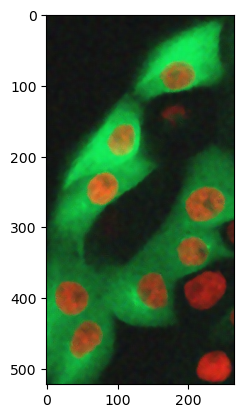

In [11]:
from skimage.restoration import denoise_nl_means, estimate_sigma

img = img_as_float(io.imread("images/noisy_img.jpg"))
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

patch_kw = dict(patch_size=5,      
                patch_distance=3,  
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

plt.imshow(denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')
plt.imsave("images/NLM.jpg",denoise_img)